In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [7]:
from google.colab import drive
drive.mount('/content/drive')
train_data_dir = '/content/drive/MyDrive/17Flower/train'
test_data_dir = '/content/drive/MyDrive/17Flower/test'

Mounted at /content/drive


In [15]:
train_datagen = ImageDataGenerator(validation_split=.1)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    class_mode = 'categorical',
    shuffle = True,
    subset = 'training')

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    class_mode='categorical',
    shuffle = True,
    subset='validation')

Found 925 images belonging to 17 classes.
Found 95 images belonging to 17 classes.


In [16]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', strides=2),
    MaxPooling2D(),

    Conv2D(64, (3, 3), activation='relu', padding='same', strides=2),
    MaxPooling2D(),

    Flatten(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(17, activation='softmax')])

In [17]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
early_stop = EarlyStopping(
    monitor='accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1)

In [19]:
epochs = 35

history = model.fit(
    train_generator,
    epochs=epochs,
    callbacks=[early_stop],
    validation_data=validation_generator)

Epoch 1/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 791ms/step - accuracy: 0.0752 - loss: 49.4053 - val_accuracy: 0.1789 - val_loss: 2.6658
Epoch 2/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 694ms/step - accuracy: 0.2745 - loss: 2.3644 - val_accuracy: 0.4211 - val_loss: 1.9904
Epoch 3/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 754ms/step - accuracy: 0.5467 - loss: 1.5367 - val_accuracy: 0.4947 - val_loss: 1.8432
Epoch 4/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 687ms/step - accuracy: 0.8118 - loss: 0.7847 - val_accuracy: 0.4526 - val_loss: 1.7887
Epoch 5/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 747ms/step - accuracy: 0.8831 - loss: 0.4376 - val_accuracy: 0.4632 - val_loss: 1.9652
Epoch 6/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 726ms/step - accuracy: 0.9436 - loss: 0.2172 - val_accuracy: 0.4842 - val_loss: 2.0667
Epoch 7/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 41s 750ms/step - accuracy: 0.9573 - loss: 0.1585 - val_accuracy: 0.4632 - val_loss: 2.2060
Epoch 8/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 690ms/step - accuracy: 0.9584 - loss: 0.1353 - val_acc

Found 340 images belonging to 17 classes.
11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step


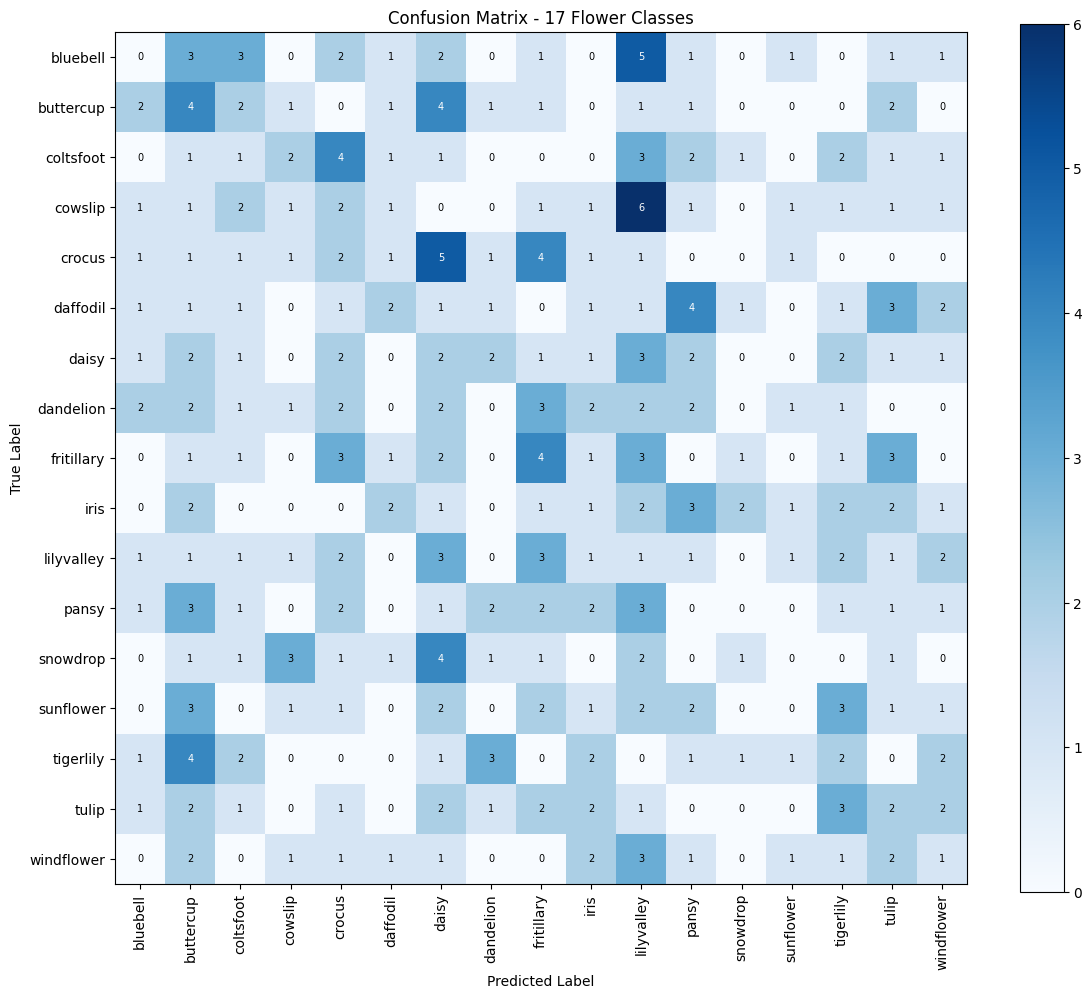

In [22]:
test_datagen = ImageDataGenerator()

test_dataset = test_datagen.flow_from_directory(
    test_data_dir,
    class_mode = 'categorical',
    shuffle = True)

label_flowers = ['bluebell', 'buttercup', 'coltsfoot', 'cowslip', 'crocus', 'daffodil', 'daisy', 'dandelion',
                'fritillary', 'iris', 'lilyvalley', 'pansy', 'snowdrop', 'sunflower', 'tigerlily', 'tulip', 'windflower']

preds = model.predict(test_dataset, verbose=1)

Y_pred = np.argmax(preds, axis=1)
Y_true = test_dataset.classes

cm = confusion_matrix(Y_true, Y_pred)

plt.figure(figsize=(12, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - 17 Flower Classes')
plt.colorbar()

tick_marks = np.arange(len(label_flowers))
plt.xticks(tick_marks, label_flowers, rotation=90)
plt.yticks(tick_marks, label_flowers)

thresh = cm.max() / 2.
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize=7)

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

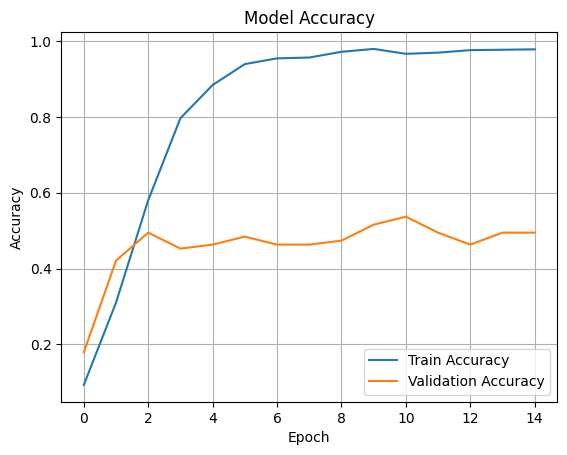

In [25]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

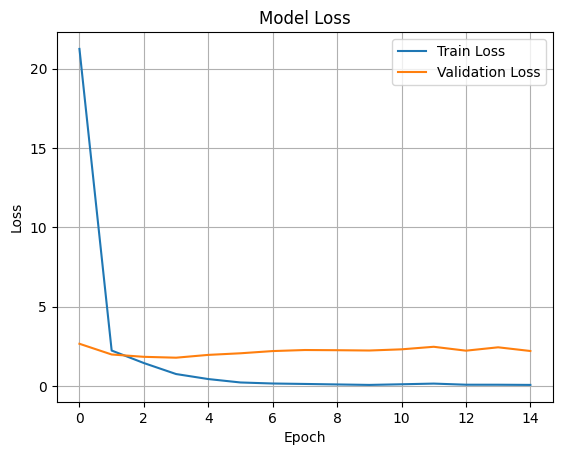

In [26]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


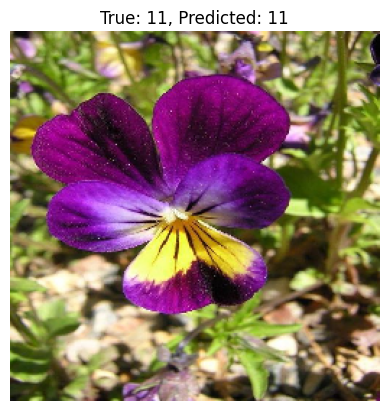

In [37]:
x_test, y_test = next(test_dataset)

index = np.random.randint(0, len(x_test))
image = x_test[index]
true_label = np.argmax(y_test[index])

prediction = model.predict(np.expand_dims(image, axis=0))
predicted_label = np.argmax(prediction)

img_np = image
if isinstance(img_np, np.ndarray) and img_np.max() > 1.0:
    img_np = img_np / 255.0

plt.imshow(img_np)
plt.title(f"True: {true_label}, Predicted: {predicted_label}")
plt.axis("off")
plt.show()

In [28]:
print("Train Loss:", history.history['loss'][-1])
print("Train Accuracy:", history.history['accuracy'][-1])
print("Val Loss:", history.history['val_loss'][-1])
print("Val Accuracy:", history.history['val_accuracy'][-1])

test_loss, test_acc = model.evaluate(test_dataset, verbose=1)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

Train Loss: 0.07474638521671295
Train Accuracy: 0.9783783555030823
Val Loss: 2.210326671600342
Val Accuracy: 0.49473685026168823
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 373ms/step - accuracy: 0.4323 - loss: 2.7300
Test Loss: 2.6114981174468994
Test Accuracy: 0.42941176891326904
